In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
number_of_tag_barcode = 384
number_of_pcr_index = 384
input_cell_number = 20000
tag_sort_cell_num = 384
sort_cell_number = 20

In [3]:
tag_barcode_name_list = []
for i in range(number_of_tag_barcode):
    tag_barcode_name_list.append("TAG"+str(i))

pcr_index_name_list = []
for i in range(number_of_pcr_index):
    pcr_index_name_list.append("PCR"+str(i))


In [4]:
###
class cell:
    def __init__(self, cellID):
        self.cellID = cellID
    def set_tag_barcode(self, tag_barcode):
        self.tag_barcode = tag_barcode
    def set_pcr_index(self,pcr_index):
        self.pcr_index = pcr_index

    def get_tag_barcode(self):
        return self.tag_barcode
    def get_pcr_index(self):
        return self.pcr_index
    def get_cell_info(self):
        cell_info = self.tag_barcode + "|" + self.pcr_index
        return cell_info
        
def select_randomly_from_list(inputList):
    random_index = random.randrange(len(inputList))
    return inputList[random_index]

In [5]:
### randomly add cell with tag_barcode
cell_dict={}
cellID_count =0

for well in range(len(tag_barcode_name_list)):
    this_well_dict = {}
    for i in range(tag_sort_cell_num):
        print(i)
        cellID_count = cellID_count+1
        this_cell = cell(str(cellID_count))
        chosen_tag_barcode = tag_barcode_name_list[well]
        this_cell.set_tag_barcode(chosen_tag_barcode)
        cell_dict[cellID_count] = this_cell
# print(cell_dict)


375
376
377
378
379
380
381
382
383
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
26

In [6]:
### randomly sort a number of cell to one of the pcr_index well 
second_cell_dict = {}
for well in range(len(pcr_index_name_list)):
    ### pcr_index_name_list[idx] is selected, sort k number of cell into this well
    ### randomly drawn form the cell_dict 
    this_well_dict = {}
    for k in range(sort_cell_number):
        idx = random.choice(list(cell_dict))
        chosen_cell = cell_dict[idx]
        cell_dict.pop(idx)
        chosen_index =  pcr_index_name_list[well]
        chosen_cell.set_pcr_index(chosen_index)
        
        ### build some info to work with downstream
        cell_information = {"tag_barcode" : chosen_cell.get_tag_barcode(), "pcr_index" : chosen_cell.get_pcr_index(),"barcode_index" : chosen_cell.get_cell_info(),"pcr_well" : well }
        this_well_dict[idx] = cell_information 
    second_cell_dict[well] = this_well_dict.copy()

In [7]:
pooled_cell_dict ={} ### pooled final dict
for well in second_cell_dict:
    cell_in_well_dict = second_cell_dict[well]
    for cell in cell_in_well_dict:
        # print(type(cell_in_well_dict[cell]))
        pooled_cell_dict[cell] = cell_in_well_dict[cell].copy()

In [8]:
### calculate simulation collition rate
import pandas as pd
df = pd.DataFrame.from_dict(pooled_cell_dict,    orient="index")
frequency_of_each_combination = df["barcode_index"].value_counts()
collision_count = 0
unique_count =0
for item in frequency_of_each_combination:
    if item != 1:
        collision_count = collision_count + item
    else: 
        unique_count = unique_count + item
### collision rate as a fraction of total 
collision_rate =  collision_count / (collision_count + unique_count)



In [9]:
total_nuclei = len(df)
recovered_barcode = len(frequency_of_each_combination)
cluster_per_nucleus = round(400000000/recovered_barcode)
print("total nuclei generated: ",total_nuclei)
print("recovered barcodes: ",recovered_barcode)
print("collision rate: ",collision_rate)
df

total nuclei generated:  7680
recovered barcodes:  7505
collision rate:  0.04544270833333333


,tag_barcode,pcr_index,barcode_index,pcr_well
44327,TAG115,PCR0,TAG115|PCR0,0
42242,TAG110,PCR0,TAG110|PCR0,0
78156,TAG203,PCR0,TAG203|PCR0,0
42460,TAG110,PCR0,TAG110|PCR0,0
14510,TAG37,PCR0,TAG37|PCR0,0
...,...,...,...,...
52646,TAG137,PCR383,TAG137|PCR383,383
68706,TAG178,PCR383,TAG178|PCR383,383
123855,TAG322,PCR383,TAG322|PCR383,383
26162,TAG68,PCR383,TAG68|PCR383,383


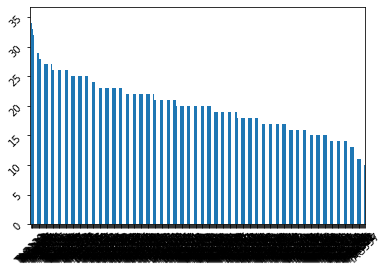

In [10]:
### Showing some metrics related to theend result
#### barchart of freaquency of each tag_barcode , pcr_index and barcode_index
plt_tag = df["tag_barcode"].value_counts().plot(kind="bar")
plt_tag.tick_params(labelrotation=45)

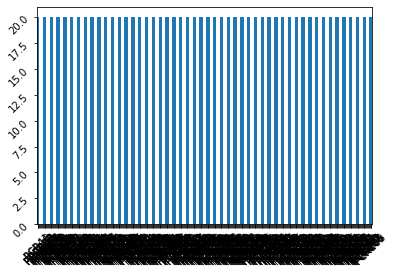

In [11]:
#### barchart of freaquency of each pcr_index 
plt_index = df["pcr_index"].value_counts().plot(kind="bar")
plt.tick_params(labelrotation=45)

<AxesSubplot:>

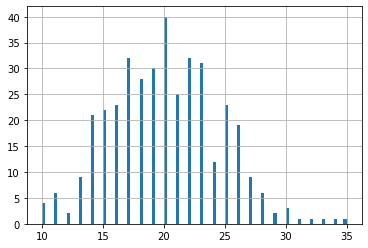

In [12]:
### histogram to show distribution 
df["tag_barcode"].value_counts(sort=False,dropna=False).hist(bins=100)

<AxesSubplot:>

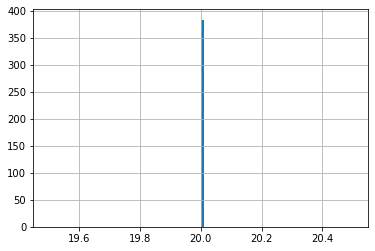

In [13]:
### histogram to show distribution 
df["pcr_index"].value_counts().hist(bins=100)

<AxesSubplot:>

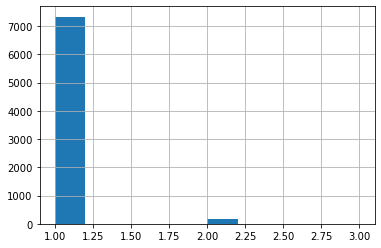

In [16]:
df["barcode_index"].value_counts().hist(bins=10)